In [16]:
import os
import random
import matplotlib.pyplot as plt
import librosa

from transformers import Wav2Vec2Processor
from scipy.io.wavfile import read
from glob import glob

dataset_path = "/wav2vec2/s-kr/fine-tune/dataset"
kss_path = os.path.join(dataset_path, "kss")
zeroth_path = os.path.join(dataset_path, "zeroth/train_data")
kspon_path = os.path.join(dataset_path, "KsponSpeech")

random.seed(44)

In [6]:
kss_wavs = sorted(glob(os.path.join(kss_path, '**', '*.wav'), recursive=True))
zeroth_wavs = sorted(glob(os.path.join(zeroth_path, '**', '*.flac'), recursive=True))
kspon_wavs = sorted(glob(os.path.join(kspon_path, '**', '*.wav'), recursive=True))

random.shuffle(kss_wavs)
random.shuffle(zeroth_wavs)
random.shuffle(kspon_wavs)

print(len(kss_wavs))
print(len(zeroth_wavs))
print(len(kspon_wavs))

12854
22263
612422


# 오디오 파형 확인

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


(63337,)
(60930,)
(74304,)
(53836,)
(87615,)
(84707,)
(34923,)
(59444,)
(78763,)
(70726,)


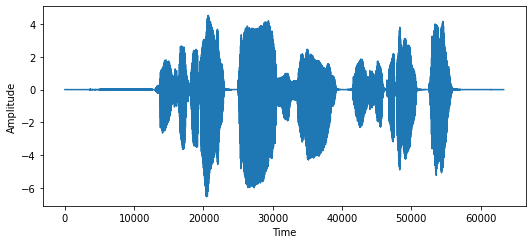

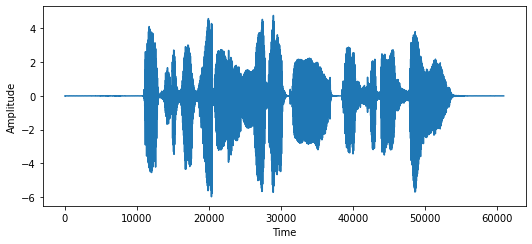

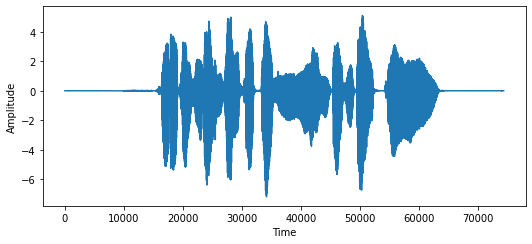

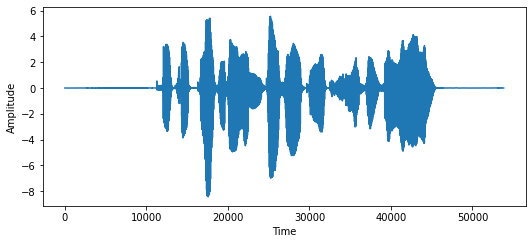

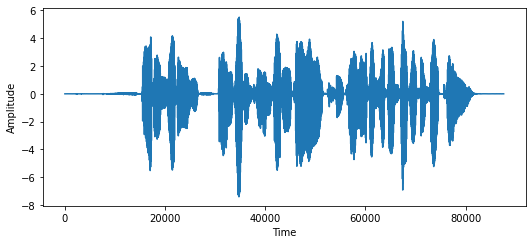

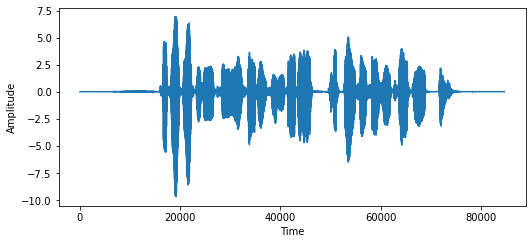

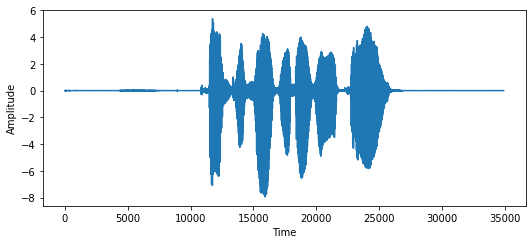

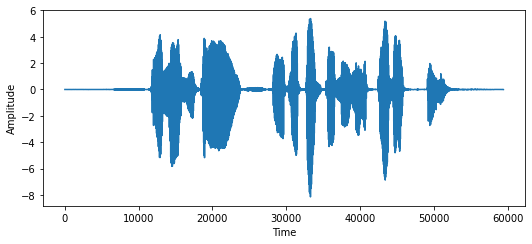

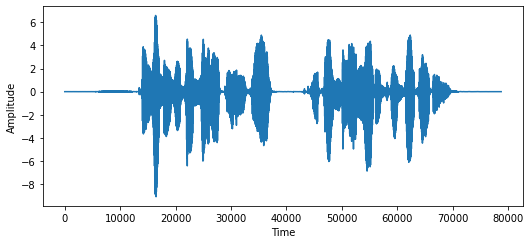

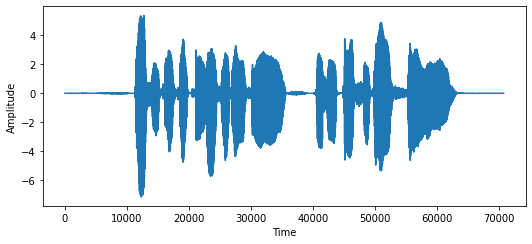

In [18]:
## 1. kss
processor = Wav2Vec2Processor.from_pretrained(os.path.join(dataset_path, "results/kss_only"))

plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True
for idx, wav in enumerate(kss_wavs[:10]):
    audio, _ = librosa.load(wav, sr=16000)
    if audio.ndim > 1:                                     # array가 2차원일 경우 1차원으로 변환
        audio = np.delete(audio, 1, axis=1)
        audio = audio.reshape(-1)
    input_value = processor(audio, sampling_rate=16000).input_values[0]
    print(input_value.shape)
    plt.figure(idx+1)
    plt.plot(input_value[0:600000])
    plt.ylabel("Amplitude")
    plt.xlabel("Time")

plt.show()

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


(144977,)
(97687,)
(256936,)
(103752,)
(120970,)
(187130,)
(131463,)
(125616,)
(117755,)
(94777,)


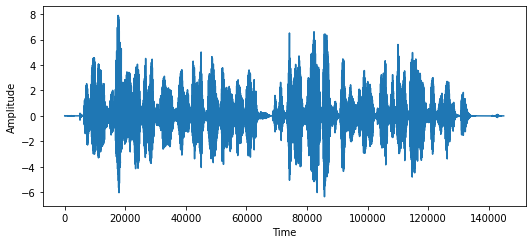

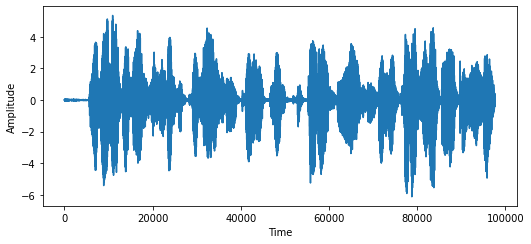

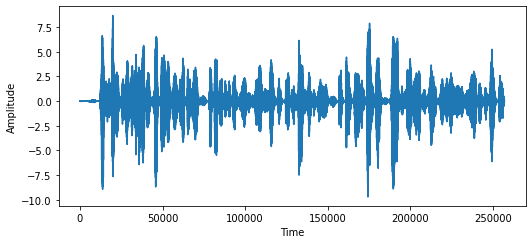

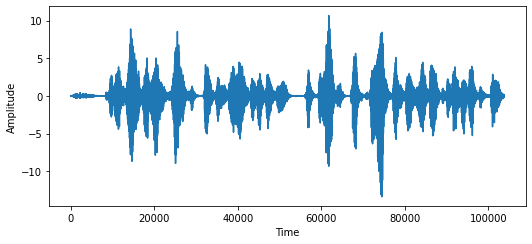

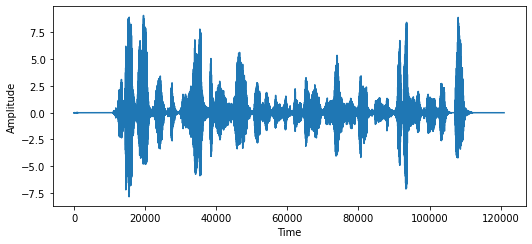

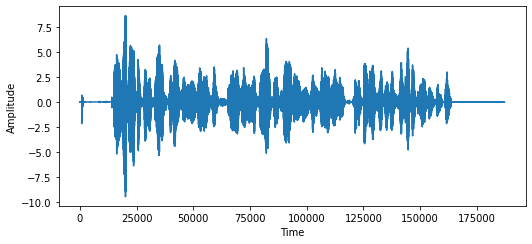

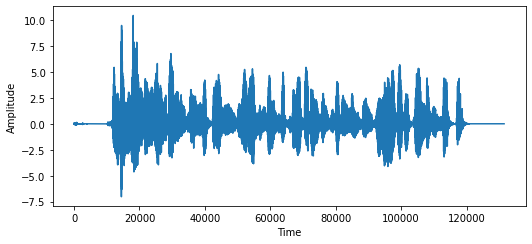

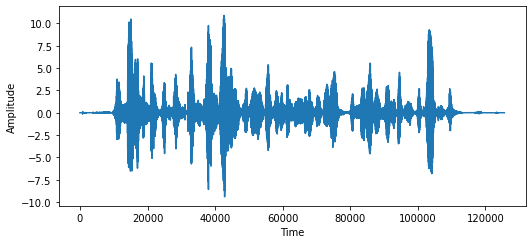

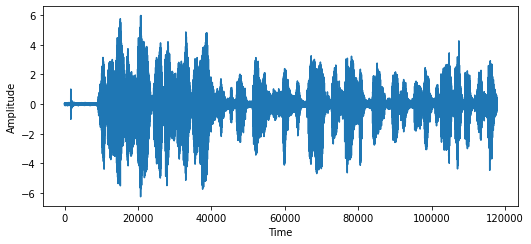

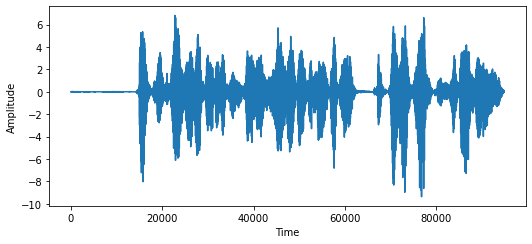

In [19]:
## 3. zeroth
processor = Wav2Vec2Processor.from_pretrained(os.path.join(dataset_path, "results/zeroth_only_100epoch"))

plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True
for idx, wav in enumerate(zeroth_wavs[:10]):
    audio, _ = librosa.load(wav, sr=16000)
    if audio.ndim > 1:                                     # array가 2차원일 경우 1차원으로 변환
        audio = np.delete(audio, 1, axis=1)
        audio = audio.reshape(-1)
    input_value = processor(audio, sampling_rate=16000).input_values[0]
    print(input_value.shape)
    plt.figure(idx+1)
    plt.plot(input_value[0:600000])
    plt.ylabel("Amplitude")
    plt.xlabel("Time")

plt.show()

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


(59680,)
(40960,)
(73840,)
(26560,)
(62800,)
(137168,)
(34160,)
(71072,)
(133472,)
(100160,)


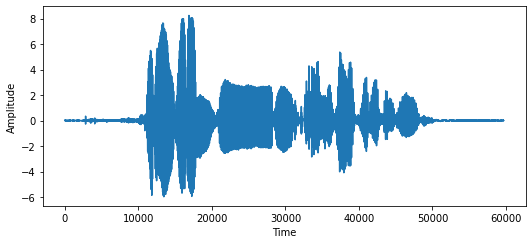

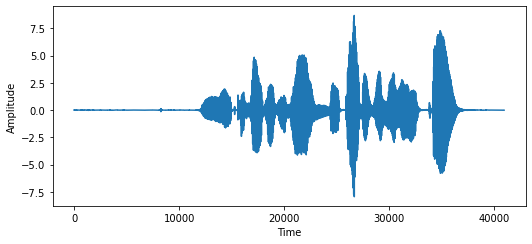

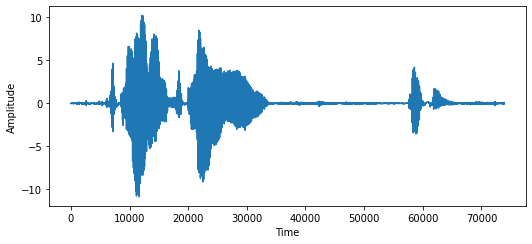

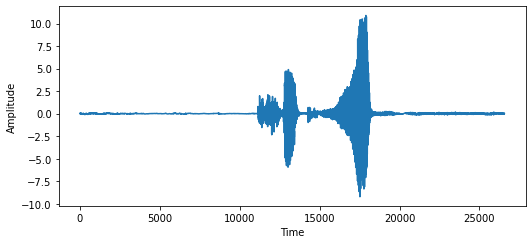

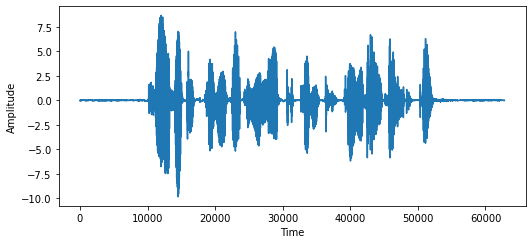

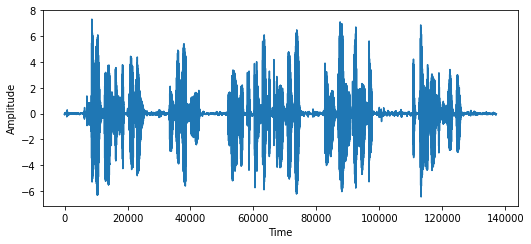

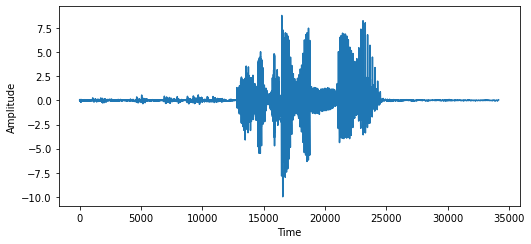

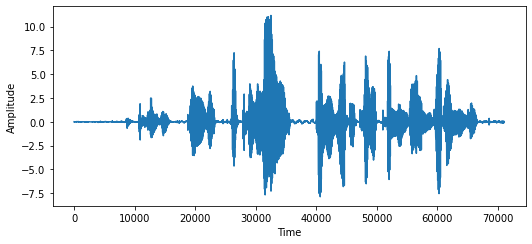

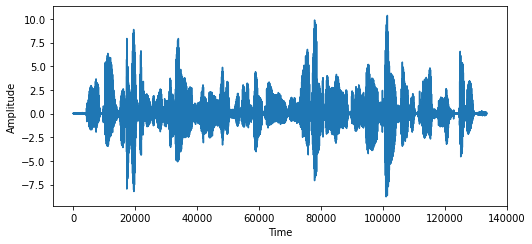

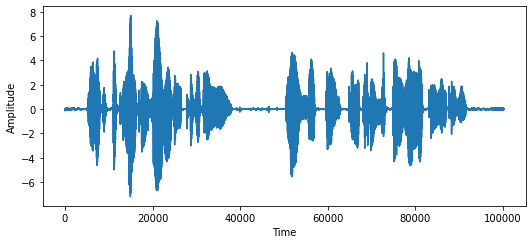

In [20]:
## 3. kspon
processor = Wav2Vec2Processor.from_pretrained(os.path.join(dataset_path, "results/kspon_60h_only"))

plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True
for idx, wav in enumerate(kspon_wavs[:10]):
    audio, _ = librosa.load(wav, sr=16000)
    if audio.ndim > 1:                                     # array가 2차원일 경우 1차원으로 변환
        audio = np.delete(audio, 1, axis=1)
        audio = audio.reshape(-1)
    input_value = processor(audio, sampling_rate=16000).input_values[0]
    print(input_value.shape)
    plt.figure(idx+1)
    plt.plot(input_value[0:600000])
    plt.ylabel("Amplitude")
    plt.xlabel("Time")

plt.show()

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


(40448,)
(26112,)
(35840,)
(9216,)
(44032,)
(104960,)
(20992,)
(56320,)
(126976,)
(76800,)


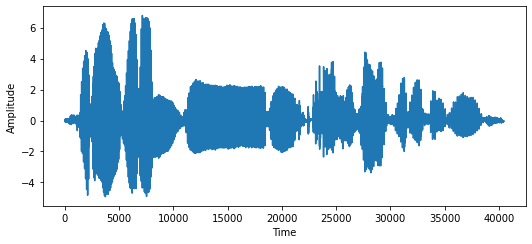

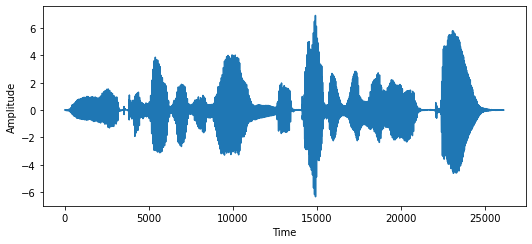

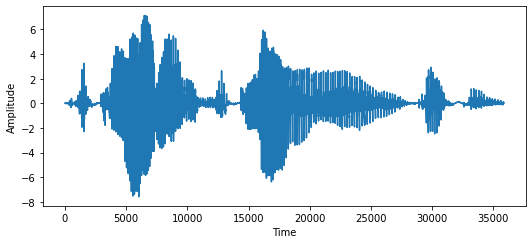

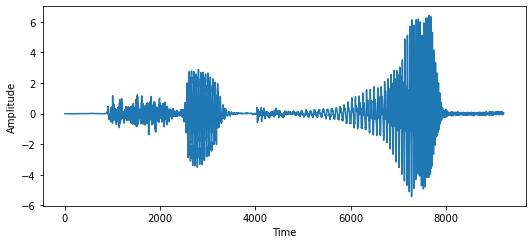

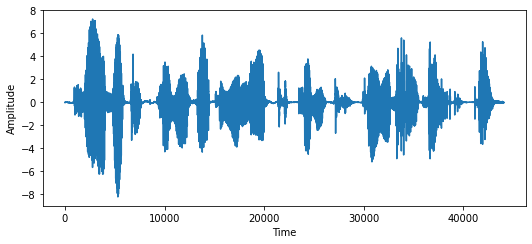

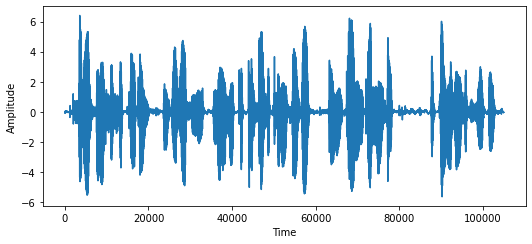

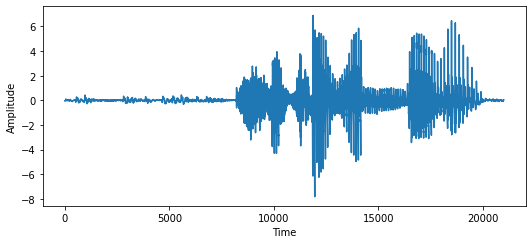

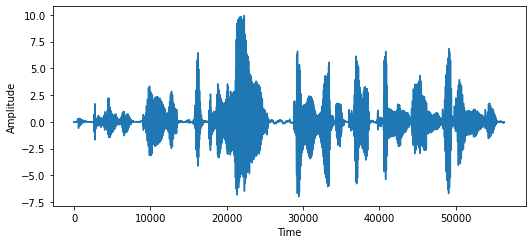

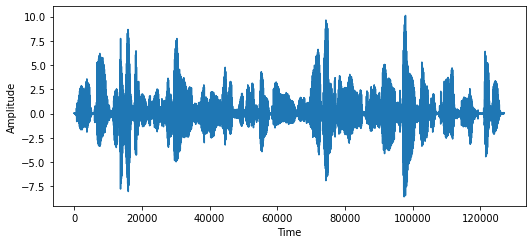

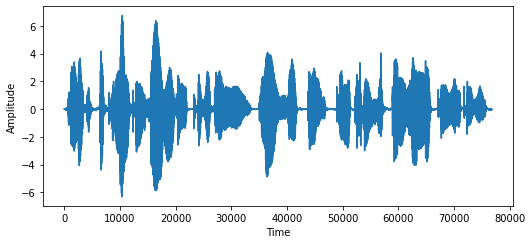

In [24]:
from kspon_preprocess import del_noise
import numpy as np

processor = Wav2Vec2Processor.from_pretrained(os.path.join(dataset_path, "results/kspon_60h_only"))

plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True
for idx, wav in enumerate(kspon_wavs[:10]):
    audio, _ = librosa.load(wav, sr=16000)
    non_silence_indices = del_noise(audio, top_db=30)
    audio = np.concatenate([audio[start:end] for start, end in non_silence_indices])
    if audio.ndim > 1:                                     # array가 2차원일 경우 1차원으로 변환
        audio = np.delete(audio, 1, axis=1)
        audio = audio.reshape(-1)
    input_value = processor(audio, sampling_rate=16000).input_values[0]
    print(input_value.shape)
    plt.figure(idx+1)
    plt.plot(input_value[0:600000])
    plt.ylabel("Amplitude")
    plt.xlabel("Time")

plt.show()

In [22]:
kss_wavs[0]

'/wav2vec2/s-kr/fine-tune/dataset/kss/4/4_2214.wav'

# test

In [4]:
time_limit=12*60*60
time_limit

43200